In [167]:
## Bike Case Study

### First Approach Simple Linear model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(40)

# Reading & Understanding the Data - Bike Day Rentals pattern details file
### Import Data
df_day = pd.read_csv('day.csv')

<Figure size 2160x2880 with 0 Axes>

In [168]:
from warnings import filterwarnings
filterwarnings("ignore")

In [169]:
#  Understanding the Data
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [170]:
df_day.shape

(730, 16)

In [171]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [172]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [173]:
df_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [174]:
df_day['yr'].astype('category').value_counts()

0    365
1    365
Name: yr, dtype: int64

In [175]:
# Assigning string values to different seasons instead of numeric values. These numeric values may misindicate some order to it.

# 1=spring
df_day.loc[(df_day['season'] == 1) , 'season'] = 'spring'

# 2=summer
df_day.loc[(df_day['season'] == 2) , 'season'] = 'summer'

# 3=fall
df_day.loc[(df_day['season'] == 3) , 'season'] = 'fall'

# 4=winter
df_day.loc[(df_day['season'] == 4) , 'season'] = 'winter'

In [176]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [177]:
df_day['season'].astype('category').value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U4'), dtype('float64')) -> None

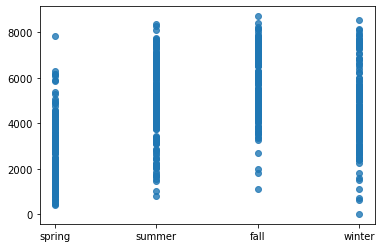

In [178]:
#visualize the data - using sns.regplot with x predictor variable as 'season' and y as 'cnt'
sns.regplot (x = 'season', y = 'cnt', data = df_day)

In [179]:
df_day['mnth'].astype('category').value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [180]:
def object_map(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
df_day[['mnth']] = df_day[['mnth']].apply(object_map)

In [181]:
df_day['mnth'].astype('category').value_counts()

Aug     62
Dec     62
Jan     62
Jul     62
Mar     62
May     62
Oct     62
Apr     60
Jun     60
Nov     60
Sept    60
Feb     56
Name: mnth, dtype: int64

In [182]:
# Assigning string values to weekdays instead of numeric values. These values may misindicate some order to it.
# A function has been created to map the actual numbers to categorical levels.
def str_map(x):
    return x.map({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'})

# Applying the function to the two columns
df_day[['weekday']] = df_day[['weekday']].apply(str_map)

In [183]:
# Checking whether the conversion is done properly or not and getting data count on the basis of weekdays
df_day['weekday'].astype('category').value_counts()

Mon      105
Tues     105
Wed      105
Sat      104
Sun      104
Thurs    104
Fri      103
Name: weekday, dtype: int64

In [184]:
df_day['workingday'].astype('category').value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [185]:
df_day['holiday'].astype('category').value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [186]:
# Replacing long weathersit names into string values for better readability and understanding

# 1-Clear, Few clouds, Partly cloudy, Partly cloudy
df_day.loc[(df_day['weathersit'] == 1) , 'weathersit'] = 'Cloudy'

# 2-Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
df_day.loc[(df_day['weathersit'] == 2) , 'weathersit'] = 'Misty'

# 3-Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
df_day.loc[(df_day['weathersit'] == 3) , 'weathersit'] = 'Thunder'

# 4-Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
df_day.loc[(df_day['weathersit'] == 4) , 'weathersit'] = 'Rainy'

In [187]:
df_day['weathersit'].unique()

array(['Misty', 'Cloudy', 'Thunder'], dtype=object)

In [188]:
df_day['weathersit'].astype('category').value_counts()

Cloudy     463
Misty      246
Thunder     21
Name: weathersit, dtype: int64

In [189]:
df_day['season'].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [190]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Mon,0,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tues,0,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thurs,1,Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
### 2. Data Visualisation

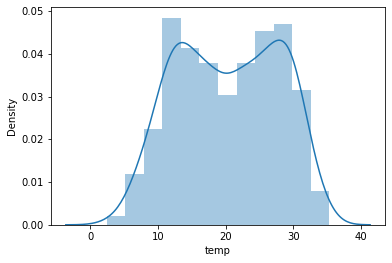

In [191]:
sns.distplot(df_day['temp'])
plt.show()

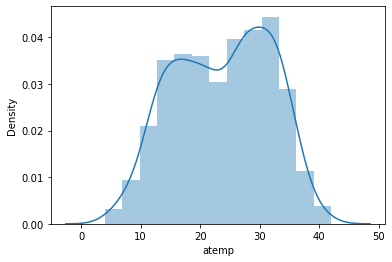

In [192]:
sns.distplot(df_day['atemp'])
plt.show()

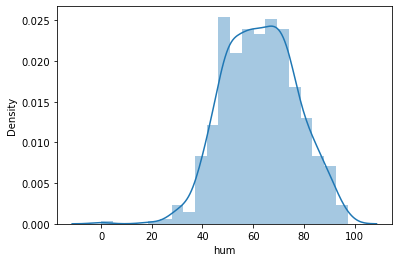

In [193]:
sns.distplot(df_day['hum'])
plt.show()

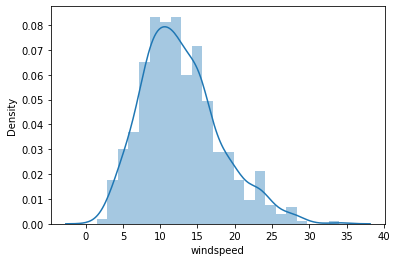

In [194]:
sns.distplot(df_day['windspeed'])
plt.show()

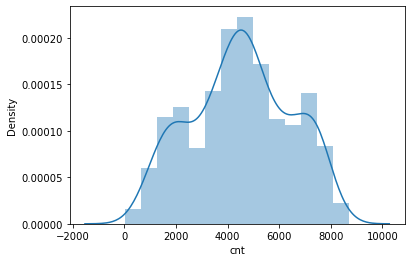

In [195]:
sns.distplot(df_day['cnt'])
plt.show()

In [196]:
# Converting date to datetime format
df_day['dteday']=df_day['dteday'].astype('datetime64')

In [197]:
# All categorical variables in the dataset
df_day_categorical = df_day.select_dtypes(exclude=['float64','datetime64','int64'])
print(df_day_categorical.columns)

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')


In [198]:
df_day_categorical

,season,mnth,weekday,weathersit
0,spring,Jan,Mon,Misty
1,spring,Jan,Tues,Misty
2,spring,Jan,Wed,Cloudy
3,spring,Jan,Thurs,Cloudy
4,spring,Jan,Fri,Cloudy
...,...,...,...,...
725,spring,Dec,Sat,Misty
726,spring,Dec,Sun,Misty
727,spring,Dec,Mon,Misty
728,spring,Dec,Tues,Cloudy


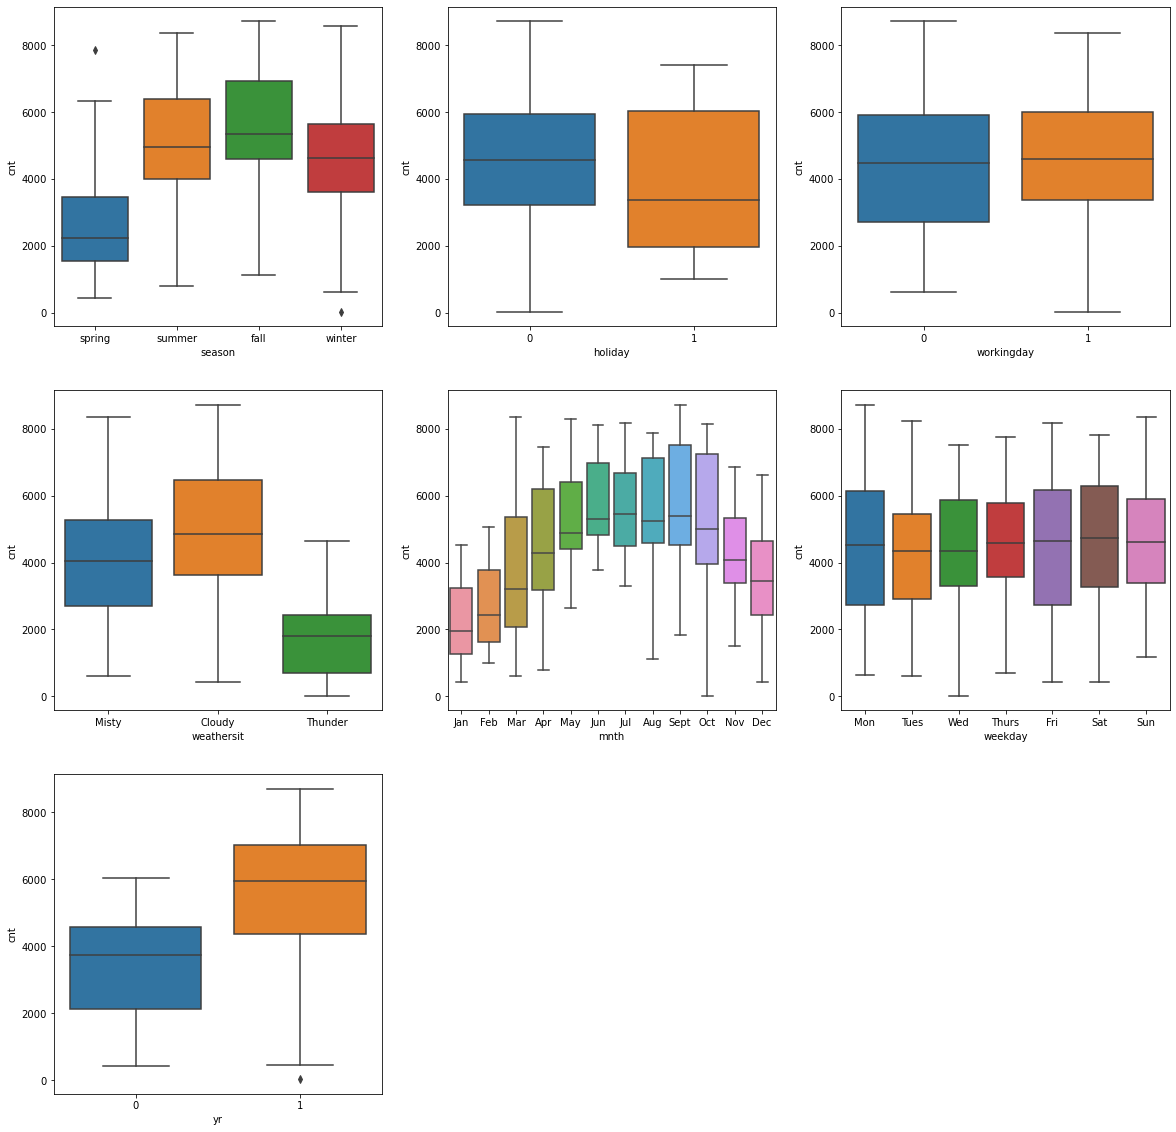

In [199]:
plt.figure(figsize=(20, 20))  
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_day)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_day)
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_day)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_day)
plt.subplot(3,3,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = df_day)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_day)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df_day)
plt.show()
#plt.subplot(3,3,8)
#sns.boxplot(x = 'date', y = 'cnt', data = BS_day)


In [200]:
IntVariableList = ["casual","registered","cnt"]
for var in IntVariableList:
    df_day[var] = df_day[var].astype("float")

In [201]:
df_day_numeric = df_day.select_dtypes(include=['float64'])
df_day_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


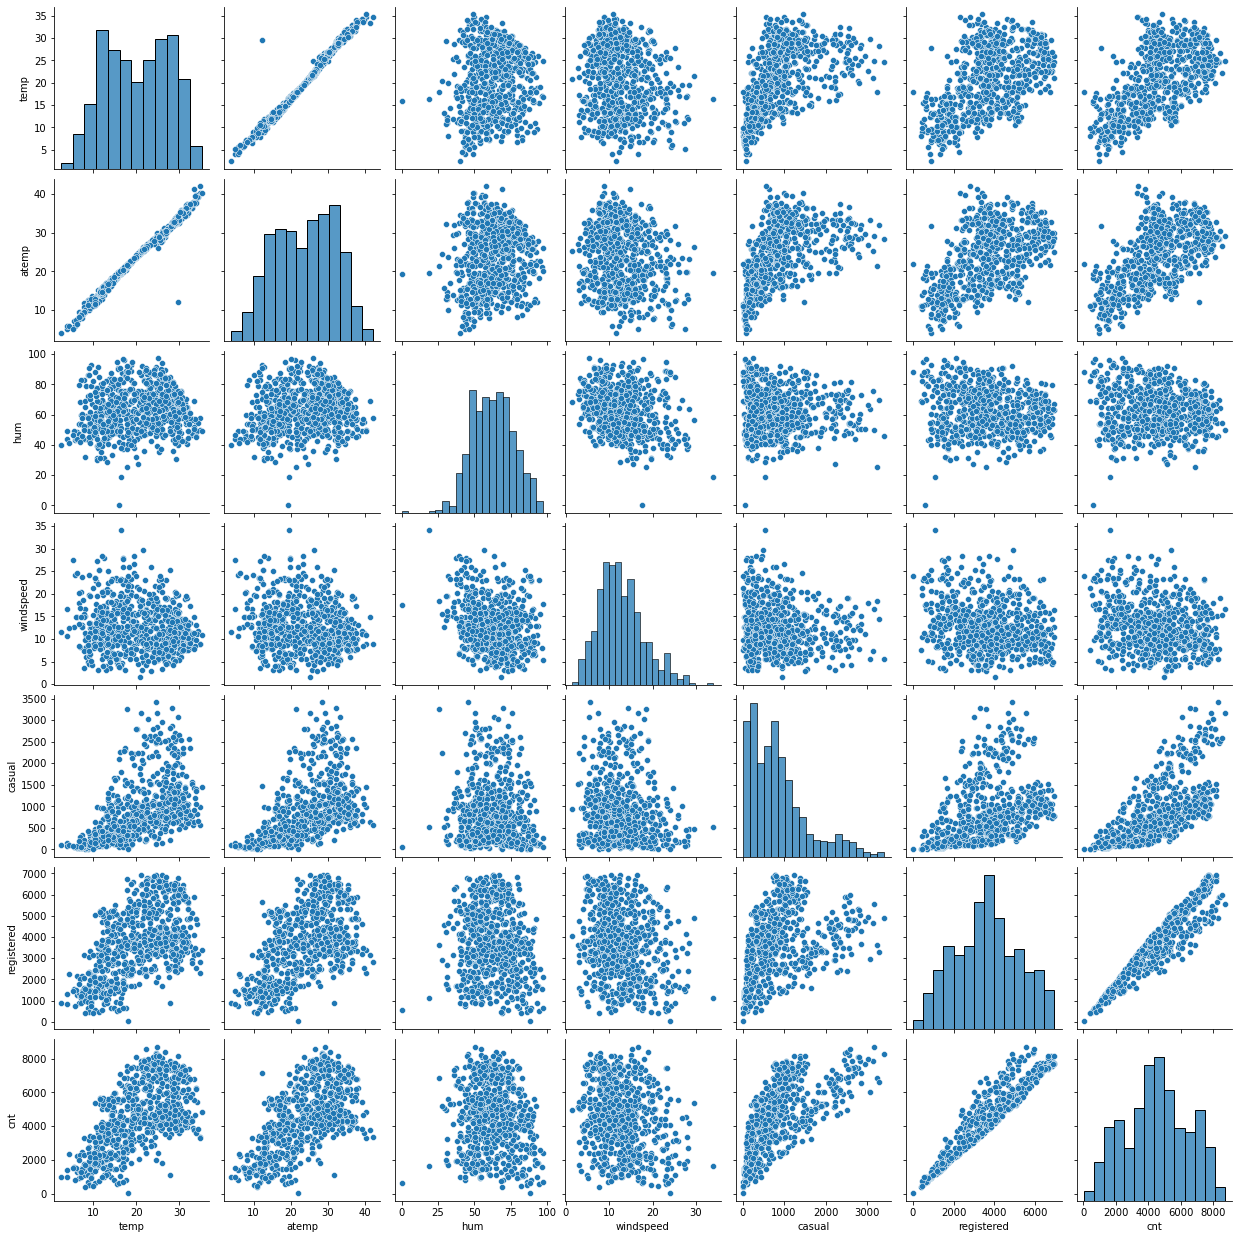

In [202]:
sns.pairplot(df_day_numeric)
plt.show()

In [203]:
cor = df_day_numeric.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


<AxesSubplot:>

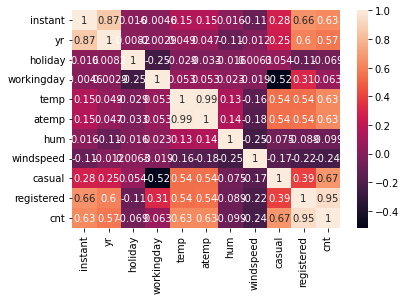

In [204]:
sns.heatmap(df_day.corr(), annot=True)

<AxesSubplot:>

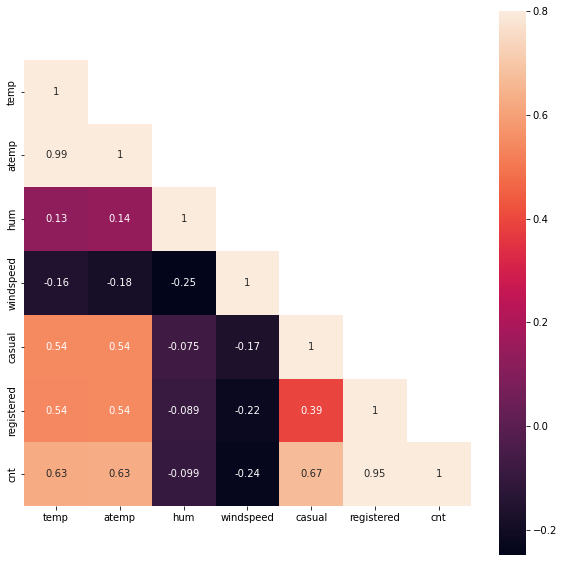

In [205]:
# heatmap
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor, mask=mask,vmax=.8, square=True,annot=True)

In [206]:
#removing atemp as it is highly correlated with temp
df_day.drop('atemp',axis=1,inplace=True)

In [59]:
## 3. Data Preparation 

In [207]:
# Subset all categorical variables
df_day_categorical = df_day.select_dtypes(include=['object'])

In [62]:
#### Dummy Variables - The variable `season`,`mnth`,`weekday` and `weathersit` have different levels. We need to convert these levels into integers. For this, we will use something called `dummy variables`.

In [208]:
# Convert into dummies
df_day_dummies = pd.get_dummies(df_day_categorical, drop_first=True)
df_day_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Misty,weathersit_Thunder
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [209]:
# Drop categorical variable columns
df_day = df_day.drop(list(df_day_categorical.columns), axis=1)

In [210]:
# Concatenate dummy variables with the original dataframe
df_day = pd.concat([df_day, df_day_dummies], axis=1)

In [211]:
# Let's check the first few rows
df_day.head()

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Misty,weathersit_Thunder
0,1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,...,0,0,1,0,0,0,0,0,1,0
1,2,2018-02-01,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,...,0,0,0,0,0,0,1,0,1,0
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,...,0,0,0,0,0,0,0,1,0,0
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,...,0,0,0,0,0,1,0,0,0,0
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,...,0,0,0,0,0,0,0,0,0,0


In [212]:
# Drop the 'instant' and 'dteday' column as they of not any use to us for the analysis
df_day = df_day.drop(['instant','dteday'], axis = 1, inplace = False)
df_day.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Misty,weathersit_Thunder
0,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0,1,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0,1,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
## 4. Model Building and Evaluation

In [213]:
# Split the dataframe into train and test sets
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(df_day, train_size=0.7, test_size=0.3, random_state=100)

In [214]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Misty,weathersit_Thunder
653,1,0,1,19.201653,55.8333,12.208807,922.0,6612.0,7534.0,0,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,29.246653,70.4167,11.083475,968.0,6248.0,7216.0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,956.0,3110.0,4066.0,1,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,10.489153,48.3333,23.500518,364.0,1432.0,1796.0,1,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,1120.0,3100.0,4220.0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,58.7917,13.916771,1017.0,5647.0,6664.0,0,...,0,0,0,0,0,0,0,1,1,0
578,1,0,1,30.852500,65.9583,8.666718,983.0,6278.0,7261.0,0,...,0,0,0,1,0,0,0,0,0,0
53,0,0,1,9.091299,42.3043,6.305571,139.0,1778.0,1917.0,1,...,0,0,0,0,0,0,0,0,0,0
350,0,0,0,10.591653,56.0833,16.292189,275.0,2464.0,2739.0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
### Scaling

In [215]:
from sklearn.preprocessing import MinMaxScaler 

In [216]:
scaler = MinMaxScaler()

In [217]:
## Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
var = ['temp', 'hum', 'windspeed','casual','registered','cnt']

df_train[var] = scaler.fit_transform(df_train[var])

In [218]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Misty,weathersit_Thunder
653,1,0,1,0.509887,0.575354,0.300794,0.280402,0.951776,0.864243,0,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.294422,0.899220,0.827658,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.290765,0.446145,0.465255,1,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,0.110332,0.203869,0.204096,1,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.340750,0.444701,0.482973,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.605840,0.355596,0.309357,0.812446,0.764151,0,...,0,0,0,0,0,0,0,1,1,0
578,1,0,1,0.863973,0.679690,0.187140,0.298994,0.903552,0.832835,0,...,0,0,0,1,0,0,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,0.041756,0.253826,0.218017,1,...,0,0,0,0,0,0,0,0,0,0
350,0,0,0,0.248216,0.577930,0.431816,0.083206,0.352873,0.312586,0,...,0,0,1,0,0,0,0,0,1,0


In [219]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Misty,weathersit_Thunder
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.254661,0.523944,0.513620,0.243137,...,0.086275,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.206011,0.228175,0.224593,0.429398,...,0.281045,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.094179,0.353487,0.356420,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.212740,0.525123,0.518638,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.327415,0.696073,0.684710,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


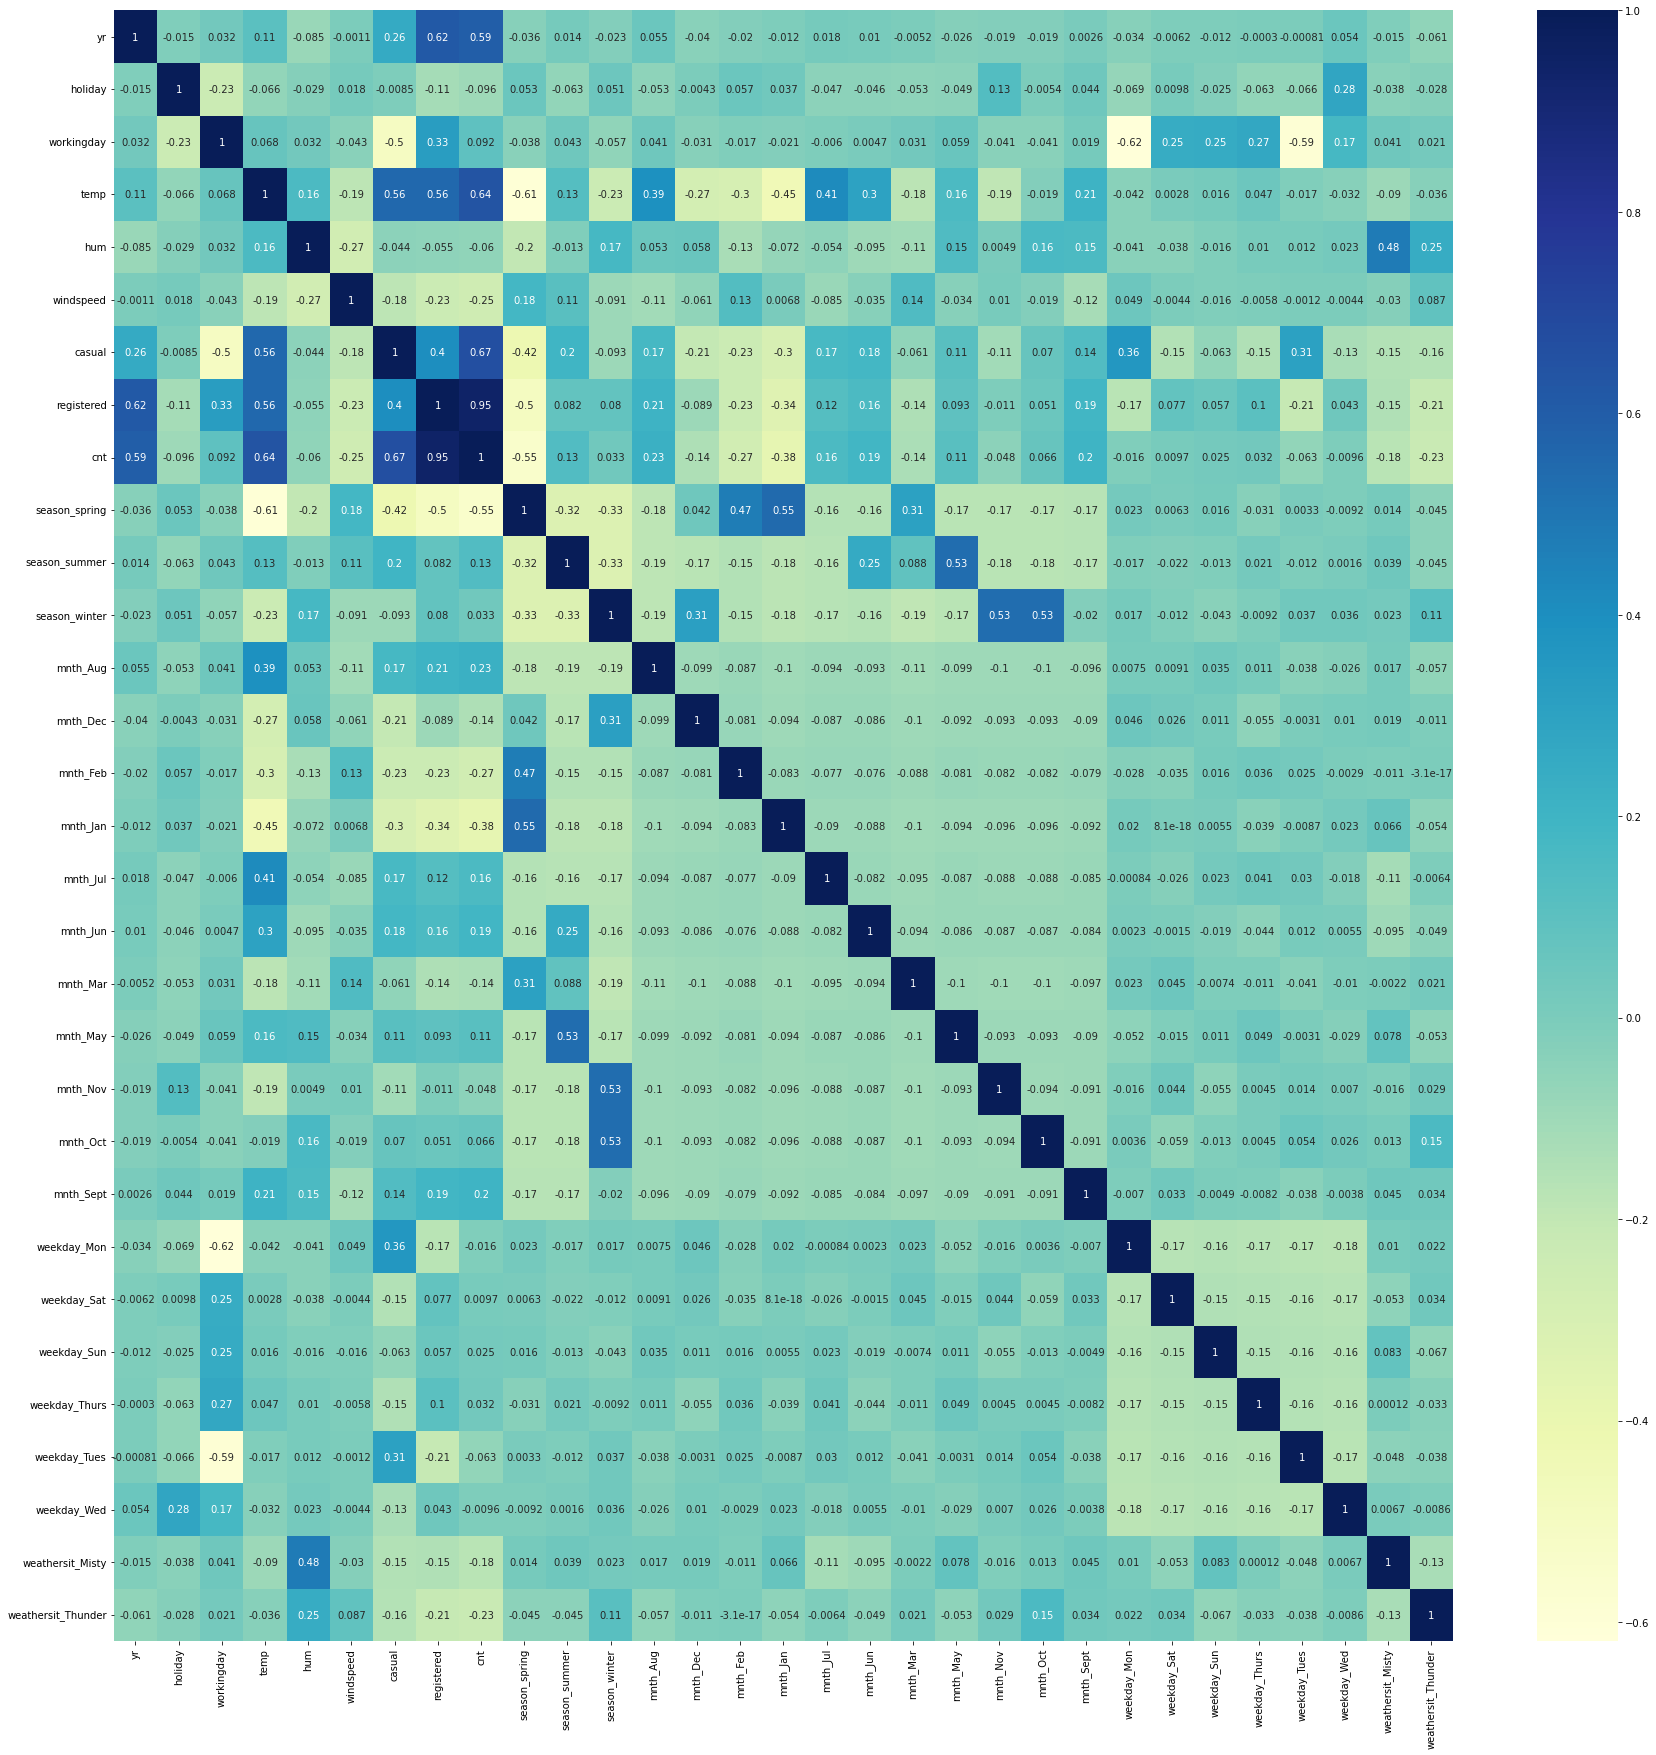

In [220]:
## Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

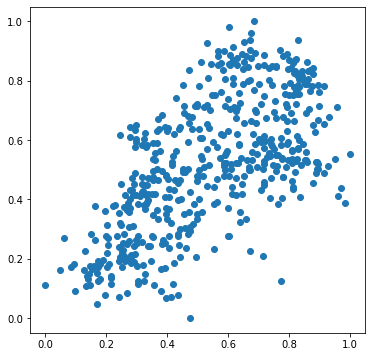

In [221]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

In [ ]:
#### Dividing into X and Y sets for the model building

In [222]:
## Dropping 'casual' and 'registered' as together they add up to cnt
y_train = df_train.pop('cnt')
X_train = df_train.drop(["casual","registered"],axis=1) 

In [223]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Misty,weathersit_Thunder
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [224]:
## This is done to convert all the features into array before fitting the model and avoid any error popping up
np.asarray(df_train)

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.]])

In [225]:
X_train.shape

(510, 28)

In [ ]:
## Building the first model with all the features. Let's now build our first model with all the features.

In [226]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const                 0.242930
yr                    0.232116
holiday               0.006726
workingday            0.093651
temp                  0.450562
hum                  -0.151340
windspeed            -0.186453
season_spring        -0.048159
season_summer         0.038725
season_winter         0.105847
mnth_Aug              0.014404
mnth_Dec             -0.045586
mnth_Feb             -0.032282
mnth_Jan             -0.062777
mnth_Jul             -0.040350
mnth_Jun             -0.002972
mnth_Mar              0.001045
mnth_May              0.023940
mnth_Nov             -0.041851
mnth_Oct              0.007534
mnth_Sept             0.081060
weekday_Mon           0.098544
weekday_Sat          -0.003849
weekday_Sun           0.005388
weekday_Thurs        -0.013502
weekday_Tues          0.044008
weekday_Wed          -0.015519
weathersit_Misty     -0.061066
weathersit_Thunder   -0.257443
dtype: float64

In [227]:
## Instantiate
lm = LinearRegression()

## Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [229]:
## Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 0.23211572 -0.05400605  0.03291909  0.45056169 -0.15134004 -0.18645332
 -0.04815901  0.03872462  0.10584692  0.01440398 -0.0455859  -0.03228181
 -0.06277659 -0.04035007 -0.00297239  0.00104515  0.02393995 -0.04185131
  0.00753359  0.0810599   0.03781128 -0.00384924  0.00538751 -0.01350234
 -0.01672432 -0.01551922 -0.0610664  -0.25744279]
0.303661877052977


In [230]:
## getting the model summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          8.74e-182
Time:                        01:55:40   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2429      0.035      6.854      0.000       0.173       0.313
yr                     0.2321      0.008     28.820      0.000       0.216       0.248
holiday                0.0067      0.024      0.278      0.781      -0.041       0.054
workingday             0.0937      0.012      7.783      0.000       0.070       0.117
temp                   0.4506      0.046      9.734      0.000       0.360       0.542
hum                   -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed             -0.1865      0.026     -7.257      0.000      -0.237      -0.136
season_spring         -0.0482      0.030     -1.607      0.109      -0.107       0.011
season_summer          0.0387      0.026      1.478      0.140      -0.013       0.090
season_winter          0.1058      0.028      3.794      0.000       0.051       0.161
mnth_Aug               0.0144      0.034      0.428      0.669      -0.052       0.081
mnth_Dec              -0.0456      0.034     -1.358      0.175      -0.112       0.020
mnth_Feb              -0.0323      0.033     -0.982      0.327      -0.097       0.032
mnth_Jan              -0.0628      0.034     -1.873      0.062      -0.129       0.003
mnth_Jul              -0.0404      0.035     -1.151      0.250      -0.109       0.029
mnth_Jun              -0.0030      0.025     -0.119      0.906      -0.052       0.046
mnth_Mar               0.0010      0.025      0.043      0.966      -0.047       0.049
mnth_May               0.0239      0.021      1.140      0.255      -0.017       0.065
mnth_Nov              -0.0419      0.036     -1.152      0.250      -0.113       0.030
mnth_Oct               0.0075      0.036      0.211      0.833      -0.063       0.078
mnth_Sept              0.0811      0.032      2.533      0.012       0.018       0.144
weekday_Mon            0.0985      0.013      7.300      0.000       0.072       0.125
weekday_Sat           -0.0038      0.015     -0.263      0.793      -0.033       0.025
weekday_Sun            0.0054      0.015      0.362      0.718      -0.024       0.035
weekday_Thurs         -0.0135      0.015     -0.917      0.359      -0.042       0.015
weekday_Tues           0.0440      0.014      3.213      0.001       0.017       0.071
weekday_Wed           -0.0155      0.015     -1.064      0.288      -0.044       0.013
weathersit_Misty      -0.0611      0.010     -5.854      0.000      -0.082      -0.041
weathersit_Thunder    -0.2574      0.026     -9.778      0.000      -0.309      -0.206
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.382
Skew:                          -0.804   Prob(JB):             

In [ ]:
#### This model has an Adjusted R-squared value of **84.5%** which seems pretty good. But let's see if we can reduce the number of features and exclude those which are not much relevant in explaining the target variable.

In [ ]:
# Model Building Using RFE

In [231]:
## Import RFE
from sklearn.feature_selection import RFE

## RFE with 15 features
lm = LinearRegression()
rfe1 = RFE(lm, n_features_to_select=15,step=1)

## Fit with 15 features
rfe1.fit(X_train, y_train)

## Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)  

[ True  True  True  True  True  True  True  True  True False False False
  True  True False False False False False  True  True False False False
 False False  True  True]
[ 1  1  1  1  1  1  1  1  1  6  3  4  1  1 13 14  5  2 10  1  1 12 11  9
  7  8  1  1]


In [ ]:
# Model Building and Evaluation 

In [232]:
## Import statsmodels
import statsmodels.api as sm  

## Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

## Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

## Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Jan,mnth_Jul,mnth_Sept,weekday_Mon,weathersit_Misty,weathersit_Thunder
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,1,0
728,1.0,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1,1,0


In [233]:
## Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          2.31e-191
Time:                        01:56:41   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2510      0

In [234]:
## Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [236]:
a=X_train_rfe1.drop('const',axis=1)

In [237]:
## Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,season_spring,4.53
8,season_winter,3.48
7,season_summer,2.84
13,weathersit_Misty,2.29
0,yr,2.09
12,weekday_Mon,1.98


In [239]:
## Import RFE
from sklearn.feature_selection import RFE

## RFE with 7 features
lm = LinearRegression()

rfe2 = RFE(lm, n_features_to_select=7, step=1)
## Fit with 7 features
rfe2.fit(X_train, y_train)

## Print the boolean results
print(rfe2.support_)           
print(rfe2.ranking_)  

[ True False False  True  True  True  True False False False False False
 False  True False False False False False False False False False False
 False False False  True]
[ 1  2  8  1  1  1  1  6  3 14 11 12  9  1 21 22 13 10 18  4  7 20 19 17
 15 16  5  1]


In [240]:
## Import statsmodels
import statsmodels.api as sm  

## Subset the features selected by rfe1
col1 = X_train.columns[rfe2.support_]

## Subsetting training data for 7 selected columns
X_train_rfe2 = X_train[col1]

## Add a constant to the model
X_train_rfe2 = sm.add_constant(X_train_rfe2)
X_train_rfe2.head()

,const,yr,temp,hum,windspeed,season_spring,mnth_Jul,weathersit_Thunder
653,1.0,1,0.509887,0.575354,0.300794,0,0,0
576,1.0,1,0.815169,0.725633,0.264686,0,1,0
426,1.0,1,0.442393,0.640189,0.255342,1,0,0
728,1.0,1,0.245101,0.498067,0.663106,1,0,0
482,1.0,1,0.395666,0.504508,0.188475,0,0,0


In [241]:
## Fitting the model with 7 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     312.2
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          2.34e-178
Time:                        10:49:28   Log-Likelihood:                 466.35
No. Observations:                 510   AIC:                            -916.7
Df Residuals:                     502   BIC:                            -882.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4277      0

In [242]:
b=X_train_rfe2.drop('const',axis=1)

In [243]:
## Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = b.columns
vif['VIF'] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,10.47
1,temp,10.37
3,windspeed,3.89
0,yr,2.03
4,season_spring,1.80
5,mnth_Jul,1.35
6,weathersit_Thunder,1.11


In [244]:
## Let's drop the 'hum' column
X_train_rfe2.drop("hum",axis=1,inplace=True)
X_train_rfe2

,const,yr,temp,windspeed,season_spring,mnth_Jul,weathersit_Thunder
653,1.0,1,0.509887,0.300794,0,0,0
576,1.0,1,0.815169,0.264686,0,1,0
426,1.0,1,0.442393,0.255342,1,0,0
728,1.0,1,0.245101,0.663106,1,0,0
482,1.0,1,0.395666,0.188475,0,0,0
...,...,...,...,...,...,...,...
526,1.0,1,0.824514,0.355596,0,0,0
578,1.0,1,0.863973,0.187140,0,0,0
53,1.0,0,0.202618,0.111379,1,0,0
350,1.0,0,0.248216,0.431816,0,0,0


In [245]:
X_train_rfe2 = sm.add_constant(X_train_rfe2)

## Now that we have removed one variable, let's fit the model with 6 variables
lm3 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     321.7
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.37e-168
Time:                        10:49:45   Log-Likelihood:                 440.46
No. Observations:                 510   AIC:                            -866.9
Df Residuals:                     503   BIC:                            -837.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2596      0

In [246]:
c=X_train_rfe2.drop('const',axis=1)

In [247]:
## Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = c.columns
vif['VIF'] = [variance_inflation_factor(c.values, i) for i in range(c.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.95
2,windspeed,3.72
0,yr,2.03
3,season_spring,1.49
4,mnth_Jul,1.26
5,weathersit_Thunder,1.04


In [ ]:
# Residual Analysis

In [248]:
y_train_cnt = lm3.predict(X_train_rfe2)

Text(0.5, 0, 'Errors')

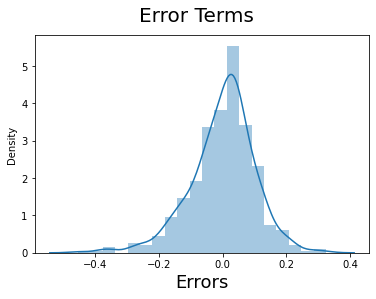

In [249]:
## Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
## Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
## Give the X-label
plt.xlabel('Errors', fontsize = 18)                         

In [ ]:
# Making Predictions

In [250]:
X_train_rfe2

,const,yr,temp,windspeed,season_spring,mnth_Jul,weathersit_Thunder
653,1.0,1,0.509887,0.300794,0,0,0
576,1.0,1,0.815169,0.264686,0,1,0
426,1.0,1,0.442393,0.255342,1,0,0
728,1.0,1,0.245101,0.663106,1,0,0
482,1.0,1,0.395666,0.188475,0,0,0
...,...,...,...,...,...,...,...
526,1.0,1,0.824514,0.355596,0,0,0
578,1.0,1,0.863973,0.187140,0,0,0
53,1.0,0,0.202618,0.111379,1,0,0
350,1.0,0,0.248216,0.431816,0,0,0


In [251]:
## Recalling the set of variables which are to be scaled
var

['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [252]:
df_test[var] = scaler.transform(df_test[var])

In [253]:
## Split the 'df_test' set into X and y after scaling
y_test = df_test.pop('cnt')
X_test = df_test.drop(["casual","registered"],axis=1)

In [254]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Misty,weathersit_Thunder
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [255]:
## Let's check the list 'col2' which had the 6 variables RFE had selected
col2=c.columns
col2

Index(['yr', 'temp', 'windspeed', 'season_spring', 'mnth_Jul',
       'weathersit_Thunder'],
      dtype='object')

In [256]:
## Let's subset these columns and create a new dataframe 'X_test_rfe1'
X_test_rfe2 = X_test[col2]

In [257]:
## Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   const               219 non-null    float64
 1   yr                  219 non-null    int64  
 2   temp                219 non-null    float64
 3   windspeed           219 non-null    float64
 4   season_spring       219 non-null    uint8  
 5   mnth_Jul            219 non-null    uint8  
 6   weathersit_Thunder  219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(3)
memory usage: 9.2 KB


In [258]:
## Making predictions
y_pred = lm3.predict(X_test_rfe2)

Text(0, 0.5, 'y_pred')

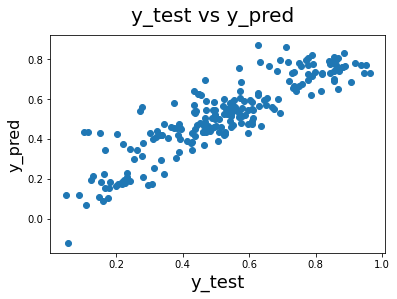

In [259]:
## Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [260]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7802124353228018

In [ ]:
## Checking the correlations between the final predictor variables

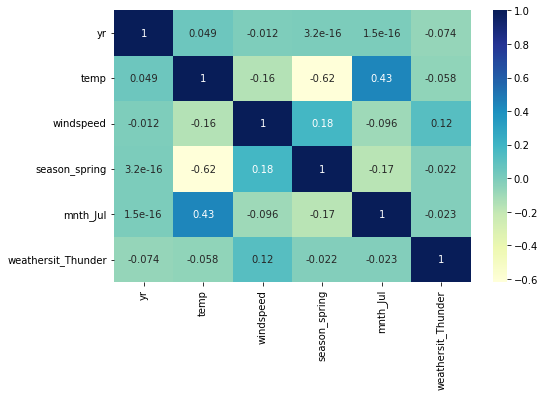

In [262]:
## Figure size
plt.figure(figsize=(8,5))

## Heatmap
sns.heatmap(df_day[col2].corr(), cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
## Thus, the final model consists of the 6 variables mentioned above.